In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [2]:
train = pd.read_csv('/kaggle/input/credit-score-classification/train.csv')

C:\Users\menna\AppData\Local\Temp\ipykernel_8656\2949129822.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.

  train = pd.read_csv('train.csv')


# *Quick peek on the data*

In [3]:
train[:8]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard


In [4]:
train.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [5]:
train.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [6]:
train.duplicated().sum()   

0

In [7]:
for col in train.columns:
    print(f'{col} : {pd.api.types.infer_dtype(train[col])}')

ID : string

Customer_ID : string

Month : string

Name : string

Age : string

SSN : string

Occupation : string

Annual_Income : string

Monthly_Inhand_Salary : floating

Num_Bank_Accounts : integer

Num_Credit_Card : integer

Interest_Rate : integer

Num_of_Loan : string

Type_of_Loan : string

Delay_from_due_date : integer

Num_of_Delayed_Payment : string

Changed_Credit_Limit : string

Num_Credit_Inquiries : floating

Credit_Mix : string

Outstanding_Debt : string

Credit_Utilization_Ratio : floating

Credit_History_Age : string

Payment_of_Min_Amount : string

Total_EMI_per_month : floating

Amount_invested_monthly : string

Payment_Behaviour : string

Monthly_Balance : mixed

Credit_Score : string


***😮Wow Monthly_Balance has mixed types😮***

# *Dropping unnecessary columns*

In [8]:
train.drop(['ID','Name','SSN','Month'],axis=1,inplace=True)

# *Dealing with wrong types*

In [9]:
wrong_types = ['Age','Annual_Income','Num_of_Loan','Num_of_Delayed_Payment','Changed_Credit_Limit',
               'Outstanding_Debt','Amount_invested_monthly','Monthly_Balance']

In [10]:
for col in wrong_types:
    if train[col][train[col] == '_'].any():
        print(col)

Changed_Credit_Limit


In [11]:
train.loc[train.Changed_Credit_Limit == '_','Changed_Credit_Limit'] = np.nan

In [12]:
for col in wrong_types:
    train[col] = train[col].str.replace('_','').astype('float64')

In [13]:
train.dtypes

Customer_ID                  object
Age                         float64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                 object
dtype: object

***Good all types are right***

# *Separating numerical and categorical columns*

In [14]:
numerical = train.select_dtypes(include=['float64','int64']).columns
numerical

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'],
      dtype='object')

In [15]:
categorical = train.select_dtypes(include=['object']).columns
categorical

Index(['Customer_ID', 'Occupation', 'Type_of_Loan', 'Credit_Mix',
       'Credit_History_Age', 'Payment_of_Min_Amount', 'Payment_Behaviour',
       'Credit_Score'],
      dtype='object')

In [16]:
(train.Customer_ID.value_counts() != 8).any()#each customer has 8 records

False

In [17]:
(train.Customer_ID.value_counts() == 8).sum()#number of customers

12500

***Age,Annual_Income and Occupation fixed for each customer***

In [18]:
train.Age = train.groupby('Customer_ID').Age.transform(lambda x : x.mode()[0])
train.Annual_Income = train.groupby('Customer_ID').Annual_Income.transform(lambda x : x.mode()[0])
train.Occupation = train.groupby('Customer_ID').Occupation.transform(lambda x : x.mode()[0])

In [19]:
for col in numerical:    
    if train[col][train[col] < 0].any():
        print(col,len(train[col][train[col] < 0]))

Num_Bank_Accounts 21

Num_of_Loan 3876

Delay_from_due_date 591

Num_of_Delayed_Payment 644

Changed_Credit_Limit 1586

Monthly_Balance 9


* ***Num_Bank_Accounts,Num_of_Loan (can't be negative)***
* ***Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Monthly_Balance (can be negative)***

In [20]:
train.Num_Bank_Accounts[train.Num_Bank_Accounts < 0].value_counts()#always -1 so it's definitely a mistake

Num_Bank_Accounts
-1    21
Name: count, dtype: int64

In [21]:
train.drop(train[train.Num_Bank_Accounts < 0].index,inplace=True)

In [22]:
train.Num_of_Loan[train.Num_of_Loan<0].value_counts()#always -100 so it's definitely a mistake

Num_of_Loan
-100.0    3875
Name: count, dtype: int64

In [23]:
train.drop(train[train.Num_of_Loan < 0].index,inplace=True)

In [24]:
train.reset_index(drop=True,inplace=True)

In [25]:
for col in numerical:    
    if train[col][train[col] < 0].any():
        print(col,len(train[col][train[col] < 0]))

Delay_from_due_date 559

Num_of_Delayed_Payment 616

Changed_Credit_Limit 1525

Monthly_Balance 9


In [26]:
train.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,96104.000000,96104.000000,81685.000000,96104.000000,96104.000000,96104.000000,96104.000000,96104.000000,89405.000000,94092.000000,94216.000000,96104.000000,96104.000000,96104.000000,91796.000000,9.334300e+04
mean,33.270707,50506.790217,4194.711239,17.096541,22.527606,72.354460,7.164832,21.072650,31.134489,10.394152,27.743090,1427.106101,32.288118,1409.238408,636.061659,-3.213953e+22
std,10.765046,38317.243974,3185.309650,117.309614,129.298964,466.483097,60.321139,14.861229,227.266979,6.795080,192.969963,1155.957167,5.114835,8324.403859,2040.035325,3.272959e+24
min,14.000000,7005.930000,303.645417,0.000000,0.000000,1.000000,0.000000,-5.000000,-3.000000,-6.490000,0.000000,0.230000,20.000000,0.000000,0.000000,-3.333333e+26
25%,24.000000,19337.160000,1625.188333,3.000000,4.000000,8.000000,2.000000,10.000000,9.000000,5.320000,3.000000,566.022500,28.060916,30.305498,74.549548,2.698778e+02
50%,33.000000,36993.940000,3091.386667,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,9.410000,6.000000,1166.640000,32.307331,69.246684,135.821176,3.364020e+02
75%,42.000000,71681.400000,5957.448333,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,14.890000,9.000000,1948.980000,36.500450,161.340704,265.579429,4.694649e+02
max,56.000000,179987.280000,15204.633333,1798.000000,1499.000000,5797.000000,1496.000000,67.000000,4397.000000,36.490000,2597.000000,4998.070000,50.000000,82331.000000,10000.000000,1.602041e+03


In [27]:
train.Num_Bank_Accounts[train.Num_Bank_Accounts > 50].value_counts()

Num_Bank_Accounts
803     7
791     5
1668    5
105     5
1257    4
       ..
887     1
211     1
385     1
1221    1
697     1
Name: count, Length: 887, dtype: int64

In [28]:
train.drop(train[train.Num_Bank_Accounts > 50].index,inplace=True)

In [29]:
train.Num_Credit_Card[train.Num_Credit_Card > 50].value_counts()

Num_Credit_Card
849     8
852     7
218     6
183     6
106     6
       ..
1140    1
290     1
414     1
892     1
679     1
Name: count, Length: 1119, dtype: int64

In [30]:
train.drop(train[train.Num_Credit_Card > 50].index,inplace=True)

In [31]:
train.reset_index(drop=True,inplace=True)

In [32]:
train.isnull().sum()    

Customer_ID                     0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       13894
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                10574
Delay_from_due_date             0
Num_of_Delayed_Payment       6468
Changed_Credit_Limit         1949
Num_Credit_Inquiries         1809
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           8418
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4151
Payment_Behaviour               0
Monthly_Balance              2659
Credit_Score                    0
dtype: int64

# *Filling numerical columns Nulls*

In [33]:
null_num_cols = ['Monthly_Inhand_Salary','Num_of_Delayed_Payment','Changed_Credit_Limit','Num_Credit_Inquiries','Amount_invested_monthly','Monthly_Balance']
imputer = SimpleImputer(strategy='mean')
imputed_numerical = pd.DataFrame(imputer.fit_transform(train[null_num_cols]),columns=null_num_cols)
imputed_numerical.isnull().sum()


Monthly_Inhand_Salary      0
Num_of_Delayed_Payment     0
Changed_Credit_Limit       0
Num_Credit_Inquiries       0
Amount_invested_monthly    0
Monthly_Balance            0
dtype: int64

In [34]:
train[null_num_cols] = imputed_numerical

In [35]:
train.isnull().sum()

Customer_ID                     0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                10574
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           8418
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour               0
Monthly_Balance                 0
Credit_Score                    0
dtype: int64

# *Dealing with wrong values in categorical columns*

In [36]:
train.Occupation.value_counts()

Occupation
Lawyer           6566
Engineer         6329
Mechanic         6320
Architect        6303
Scientist        6277
Accountant       6224
Developer        6222
Teacher          6215
Media_Manager    6193
Entrepreneur     6165
Journalist       6086
Doctor           6070
Manager          5965
Musician         5923
Writer           5895
_______             8
Name: count, dtype: int64

***'_______' is a wrong value***

In [37]:
train.loc[train.Occupation == '_______','Occupation'] = np.nan

In [38]:
train.Type_of_Loan.value_counts()

Type_of_Loan
Not Specified                                                                                               1296
Credit-Builder Loan                                                                                         1165
Personal Loan                                                                                               1163
Student Loan                                                                                                1160
Debt Consolidation Loan                                                                                     1157
                                                                                                            ... 
Home Equity Loan, Debt Consolidation Loan, Personal Loan, Not Specified, and Mortgage Loan                     4
Auto Loan, Credit-Builder Loan, Payday Loan, Personal Loan, and Student Loan                                   4
Not Specified, Payday Loan, Payday Loan, and Credit-Builder Loan                   

In [39]:
train.Type_of_Loan[train.Type_of_Loan == '_'].any()#no wrong values

False

In [40]:
train.Credit_Mix.value_counts() 

Credit_Mix
Standard    33803
Good        22541
_           18767
Bad         17650
Name: count, dtype: int64

***'_' is a wrong value***

In [41]:
train.loc[train.Credit_Mix == '_', 'Credit_Mix'] = np.nan

<Axes: xlabel='count', ylabel='Credit_Mix'>

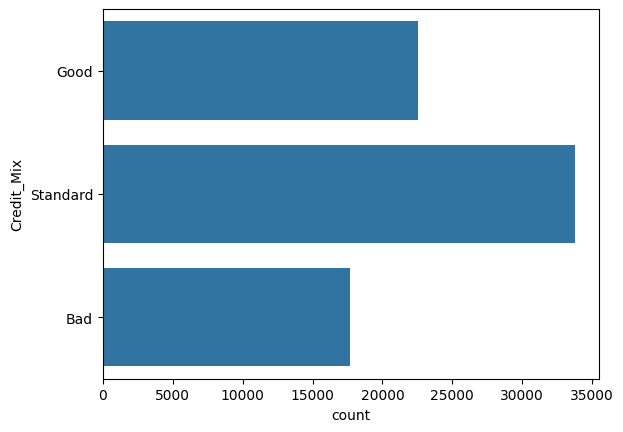

In [42]:
sns.countplot(train.Credit_Mix)

In [43]:
train.Credit_History_Age.value_counts()

Credit_History_Age
19 Years and 4 Months     415
15 Years and 11 Months    415
17 Years and 9 Months     415
19 Years and 5 Months     413
15 Years and 9 Months     410
                         ... 
0 Years and 3 Months       20
0 Years and 2 Months       13
33 Years and 7 Months      12
33 Years and 8 Months      12
0 Years and 1 Months        2
Name: count, Length: 404, dtype: int64

In [44]:
train.Credit_History_Age[train.Credit_History_Age == '_'].any()#no wrong values

False

In [45]:
train.Payment_of_Min_Amount.value_counts()

Payment_of_Min_Amount
Yes    48570
No     33071
NM     11120
Name: count, dtype: int64

***'NM' is a wrong value***

In [46]:
train.loc[train.Payment_of_Min_Amount == 'NM','Payment_of_Min_Amount'] = np.nan

<Axes: xlabel='count', ylabel='Payment_of_Min_Amount'>

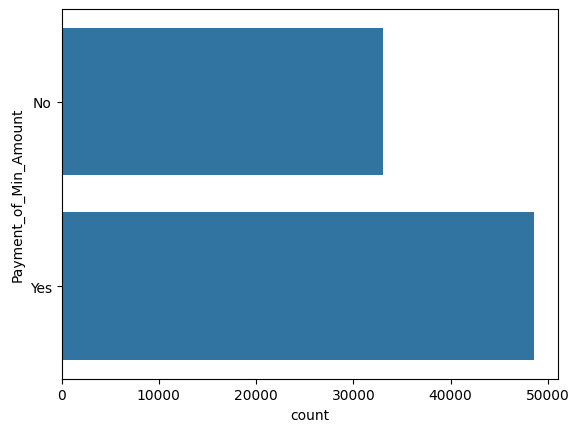

In [47]:
sns.countplot(train.Payment_of_Min_Amount)

In [48]:
train.Payment_Behaviour.value_counts()  

Payment_Behaviour
Low_spent_Small_value_payments      23630
High_spent_Medium_value_payments    16268
Low_spent_Medium_value_payments     12878
High_spent_Large_value_payments     12697
High_spent_Small_value_payments     10534
Low_spent_Large_value_payments       9717
!@9#%8                               7037
Name: count, dtype: int64

***'!@9#%8' is a wrong value***

In [49]:
train.loc[train.Payment_Behaviour == '!@9#%8','Payment_Behaviour'] = np.nan

<Axes: xlabel='count', ylabel='Payment_Behaviour'>

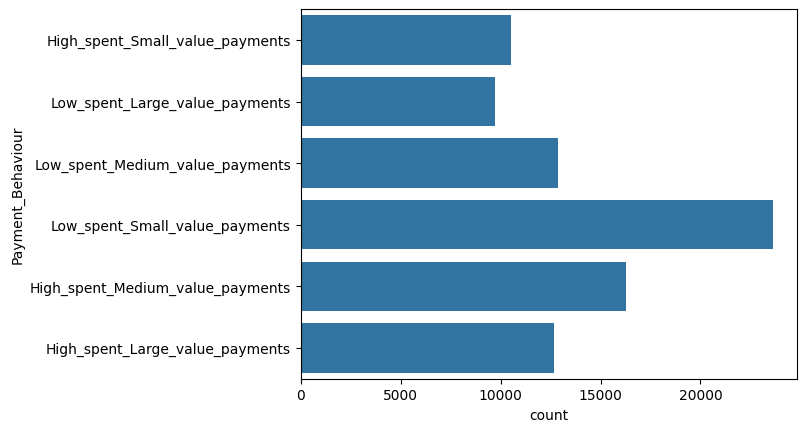

In [50]:
sns.countplot(train.Payment_Behaviour)

In [51]:
train.Credit_Score.value_counts()

Credit_Score
Standard    49370
Poor        26925
Good        16466
Name: count, dtype: int64

In [52]:
train.isnull().sum()

Customer_ID                     0
Age                             0
Occupation                      8
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                10574
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                  18767
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           8418
Payment_of_Min_Amount       11120
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour            7037
Monthly_Balance                 0
Credit_Score                    0
dtype: int64

# *Dropping the Customer_ID as i don't need it anymore*

In [53]:
train.drop(['Customer_ID'],axis=1,inplace=True)

In [54]:
categorical = categorical.drop('Customer_ID')
categorical = categorical.drop('Credit_Score')

In [55]:
categorical

Index(['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Payment_Behaviour'],
      dtype='object')

In [56]:
imputer = SimpleImputer(strategy='most_frequent')
imputed_categorical = pd.DataFrame(imputer.fit_transform(train[categorical]),columns=categorical)

In [57]:
train[categorical] = imputed_categorical

In [58]:
train.isnull().sum().any()

False

***😮Wow no Nulls😮***




In [59]:
train.shape

(92761, 23)

# *Checking the correlation to help dropping columns*

<Axes: >

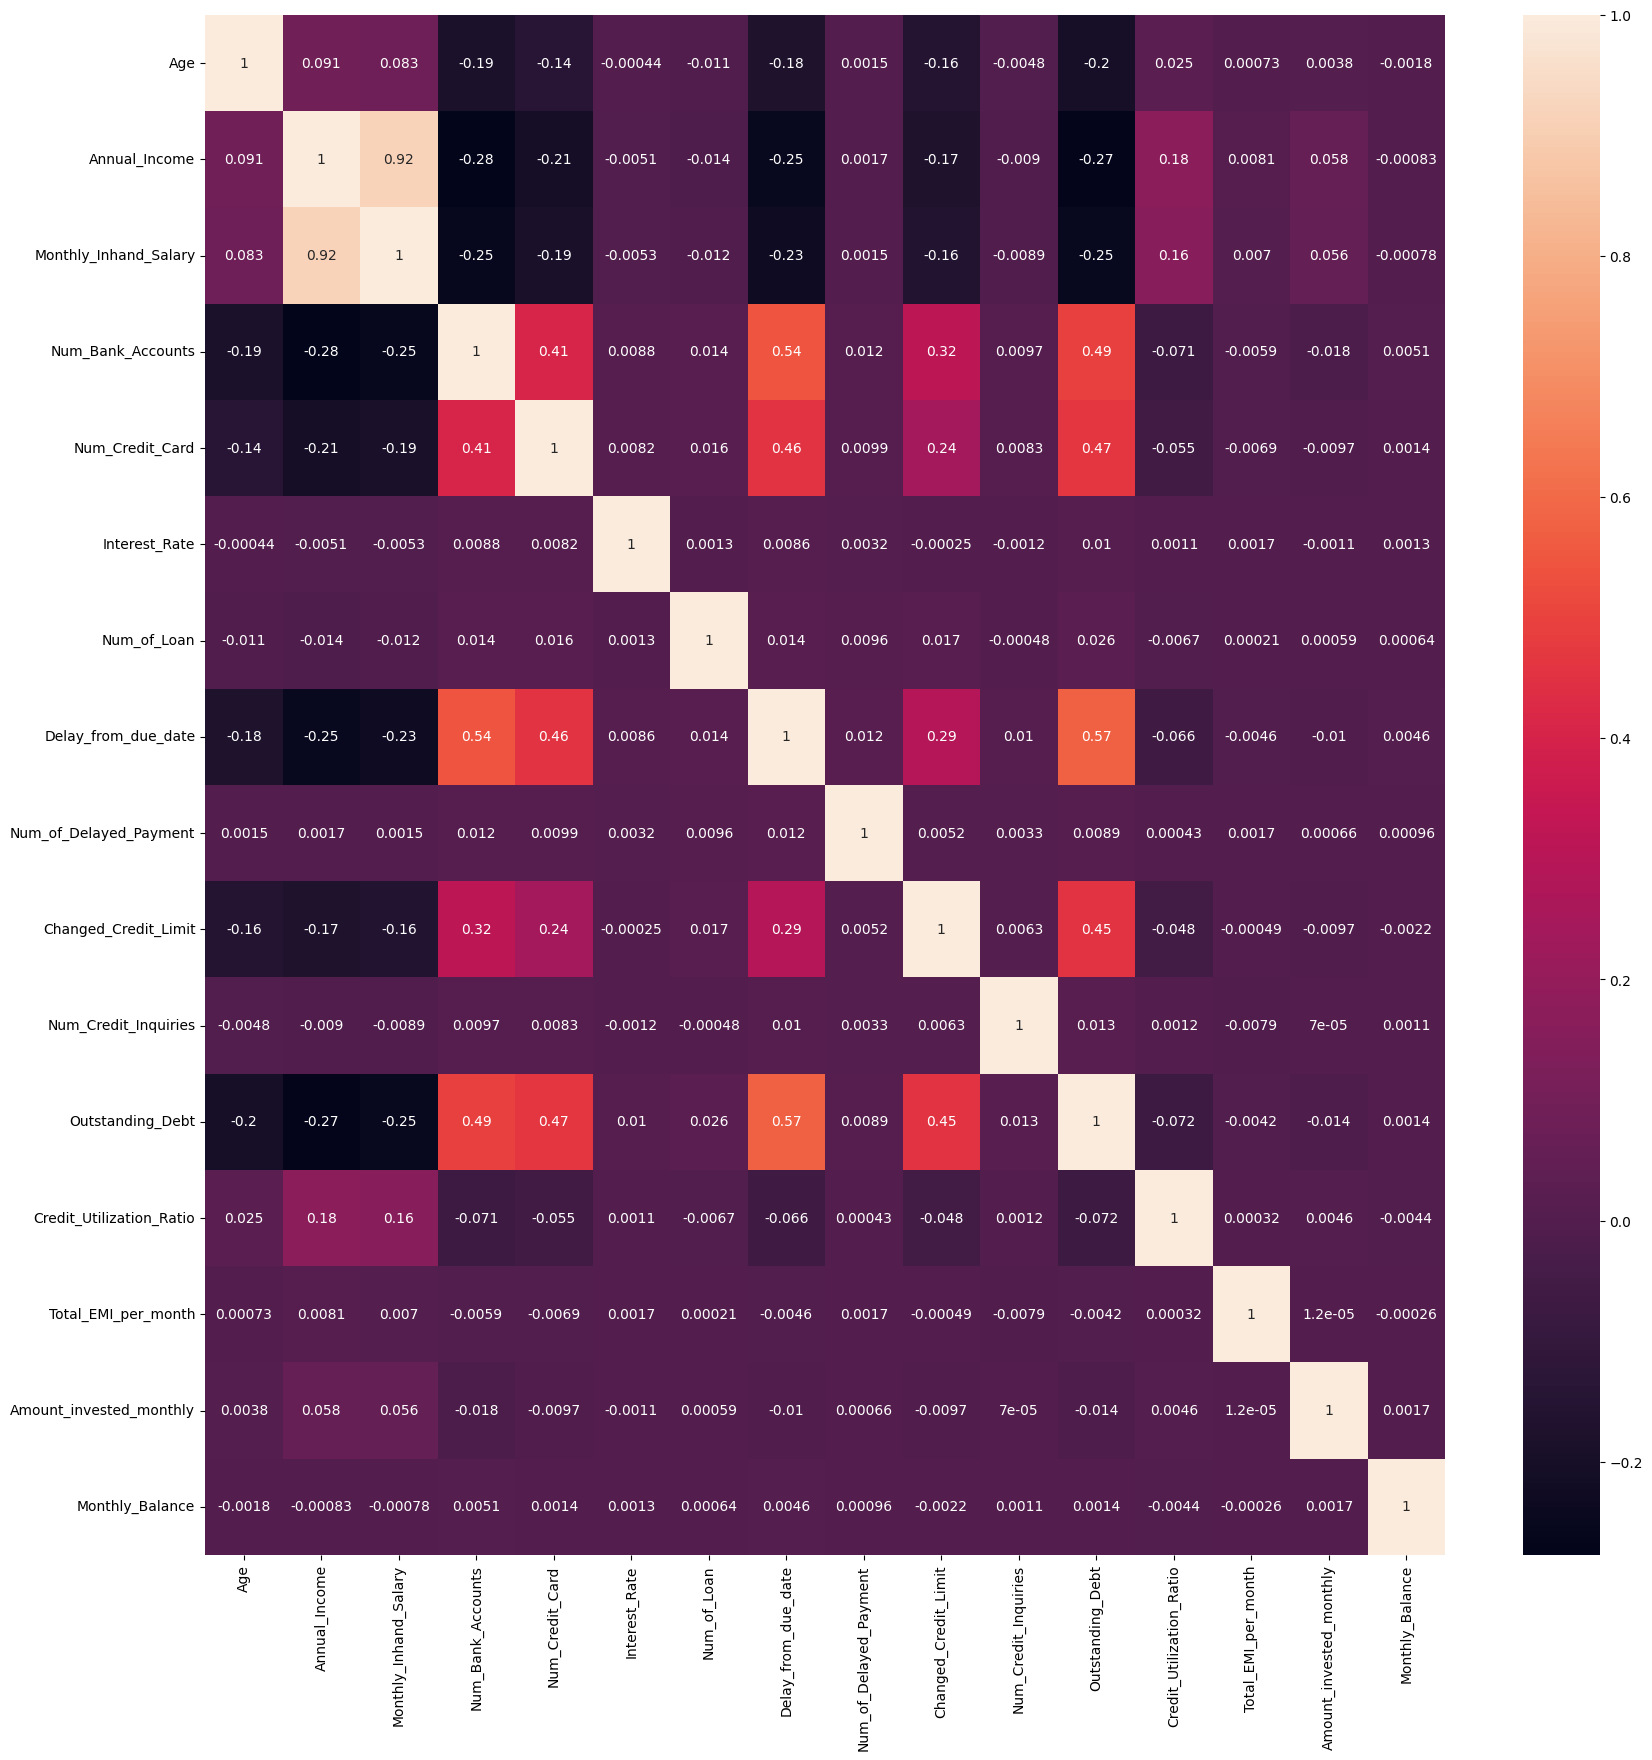

In [60]:
plt.figure(figsize=(20,20))
sns.heatmap(train[numerical].corr(),annot=True)

<Axes: >

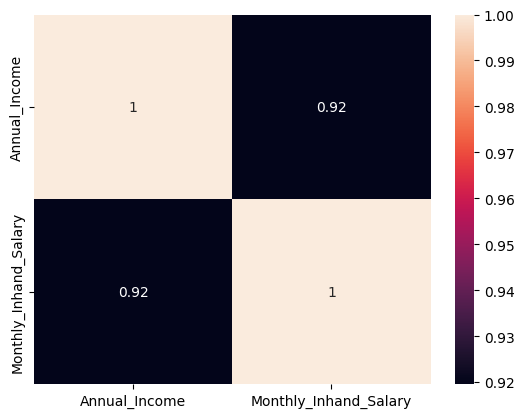

In [61]:
sns.heatmap(train[['Annual_Income','Monthly_Inhand_Salary']].corr(),annot=True)

***😮Wow pretty high correlation😮***

In [62]:
train.drop(['Monthly_Inhand_Salary'],axis=1,inplace=True)

In [63]:
numerical = numerical.drop('Monthly_Inhand_Salary')
numerical

Index(['Age', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'],
      dtype='object')

# *Scaling and Encoding the features*

In [64]:
train[numerical] = StandardScaler().fit_transform(train[numerical])

In [65]:
train.describe()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,9.276100e+04,9.276100e+04,9.276100e+04,9.276100e+04,9.276100e+04,9.276100e+04,9.276100e+04,9.276100e+04,9.276100e+04,9.276100e+04,9.276100e+04,9.276100e+04,9.276100e+04,9.276100e+04,9.276100e+04
mean,-2.353130e-16,5.101513e-17,-6.572220e-17,-1.167373e-16,-5.361951e-19,-2.604376e-18,1.175033e-16,1.340488e-17,2.539267e-16,2.451177e-17,1.079284e-16,-5.327481e-16,-3.401009e-17,-3.109931e-17,-5.304501e-18
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,-1.789767e+00,-1.136035e+00,-2.024119e+00,-2.546003e+00,-1.532917e-01,-1.188269e-01,-1.754057e+00,-1.554535e-01,-2.509335e+00,-1.453682e-01,-1.234069e+00,-2.402092e+00,-1.691803e-01,-3.190965e-01,-1.015172e+02
25%,-8.612538e-01,-8.142064e-01,-8.955227e-01,-7.102666e-01,-1.383736e-01,-8.566620e-02,-7.446063e-01,-1.008396e-01,-7.407175e-01,-1.296938e-01,-7.451936e-01,-8.264502e-01,-1.655313e-01,-2.805264e-01,1.014124e-02
50%,-2.559190e-02,-3.520345e-01,-1.431251e-01,-2.513325e-01,-1.277178e-01,-6.908585e-02,-2.062328e-01,-7.353261e-02,-1.239308e-01,-1.140194e-01,-2.254069e-01,2.981518e-03,-1.608489e-01,-2.474063e-01,1.014124e-02
75%,8.100700e-01,5.524795e-01,6.092724e-01,6.665357e-01,-1.127998e-01,-3.592514e-02,4.667340e-01,-5.532797e-02,6.370206e-01,-9.834506e-02,4.513822e-01,8.241005e-01,-1.497669e-01,-1.663127e-01,1.014124e-02
max,2.109989e+00,3.378552e+00,1.678582e+01,2.040070e+01,1.219887e+01,2.468538e+01,3.091305e+00,1.986965e+01,3.878495e+00,1.342341e+01,3.088483e+00,3.461818e+00,9.733405e+00,4.693287e+00,1.014124e-02


In [66]:
for col in categorical:
    train[col] = LabelEncoder().fit_transform(train[col])

In [67]:
train[categorical]

,Occupation,Type_of_Loan,Credit_Mix,Credit_History_Age,Payment_of_Min_Amount,Payment_Behaviour
0,12,128,2,180,0,2
1,12,128,1,86,0,3
2,12,128,1,184,0,4
3,12,128,1,185,0,5
4,12,128,1,186,0,1
...,...,...,...,...,...,...
92756,9,683,2,307,0,0
92757,9,683,2,308,0,1
92758,9,683,1,309,0,0
92759,9,683,1,310,0,3


In [68]:
X = train.drop('Credit_Score',axis=1)
y = train.Credit_Score

In [69]:
y.value_counts()

Credit_Score
Standard    49370
Poor        26925
Good        16466
Name: count, dtype: int64

<Axes: xlabel='Credit_Score', ylabel='Count'>

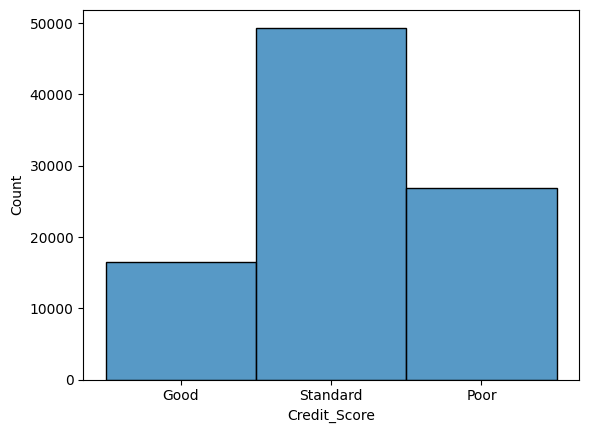

In [70]:
sns.histplot(y)

In [71]:
y = y.map({'Poor':0,'Good':1,'Standard':2})

In [72]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape

((74208, 21), (18553, 21))

# *🌠RandomForest🌠*

              precision    recall  f1-score   support



           0       0.78      0.81      0.80      5293

           1       0.75      0.73      0.74      3251

           2       0.82      0.81      0.82     10009



    accuracy                           0.80     18553

   macro avg       0.79      0.78      0.78     18553

weighted avg       0.80      0.80      0.80     18553




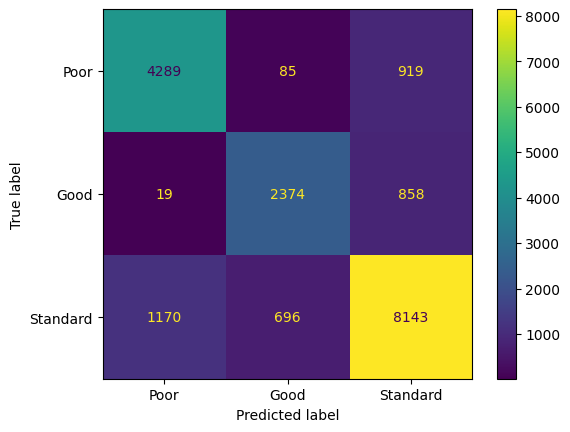

In [73]:
model = RandomForestClassifier(random_state=1234)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))
confusion_matrixDisply = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=['Poor','Good','Standard'])
confusion_matrixDisply.plot()

# *🌠XGBoost🌠*

              precision    recall  f1-score   support



           0       0.76      0.75      0.75      5293

           1       0.68      0.68      0.68      3251

           2       0.79      0.80      0.79     10009



    accuracy                           0.76     18553

   macro avg       0.74      0.74      0.74     18553

weighted avg       0.76      0.76      0.76     18553




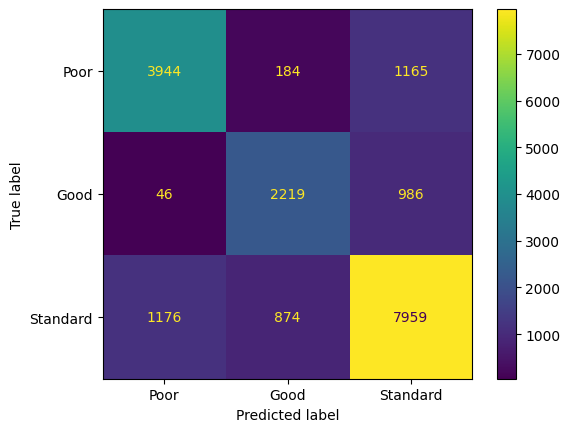

In [74]:
model = XGBClassifier(random_state=42)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))
confusion_matrixDisply = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=['Poor','Good','Standard'])
confusion_matrixDisply.plot()

# *🌠CatBoost🌠*

Learning rate set to 0.098564

0:	learn: 1.0369908	total: 179ms	remaining: 2m 59s

1:	learn: 0.9884776	total: 215ms	remaining: 1m 47s

2:	learn: 0.9480281	total: 247ms	remaining: 1m 22s

3:	learn: 0.9139904	total: 279ms	remaining: 1m 9s

4:	learn: 0.8859311	total: 307ms	remaining: 1m 1s

5:	learn: 0.8614507	total: 337ms	remaining: 55.9s

6:	learn: 0.8408871	total: 369ms	remaining: 52.3s

7:	learn: 0.8249443	total: 404ms	remaining: 50.1s

8:	learn: 0.8095158	total: 441ms	remaining: 48.6s

9:	learn: 0.7958784	total: 477ms	remaining: 47.2s

10:	learn: 0.7843223	total: 512ms	remaining: 46s

11:	learn: 0.7745967	total: 541ms	remaining: 44.5s

12:	learn: 0.7651788	total: 573ms	remaining: 43.5s

13:	learn: 0.7573037	total: 606ms	remaining: 42.7s

14:	learn: 0.7499377	total: 640ms	remaining: 42s

15:	learn: 0.7434163	total: 680ms	remaining: 41.8s

16:	learn: 0.7383974	total: 707ms	remaining: 40.9s

17:	learn: 0.7330918	total: 735ms	remaining: 40.1s

18:	learn: 0.7288416	total: 764ms	remaining:

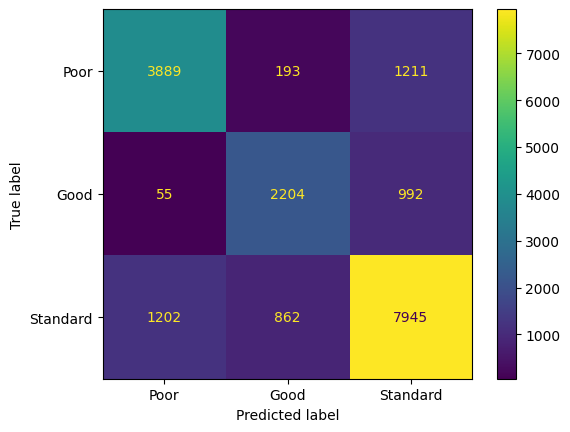

In [75]:
model = CatBoostClassifier(random_state=42)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))
confusion_matrixDisply = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=['Poor','Good','Standard'])
confusion_matrixDisply.plot()